In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
col_names = ["label", "Ids", "Date", "Flag", "User", "tweet"]
tweets_df = pd.read_csv('twitter.csv',encoding='latin-1', names=col_names)

In [3]:
tweets_df

,label,Ids,Date,Flag,User,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1557341262,Sun Apr 19 03:30:42 PDT 2009,NO_QUERY,NicolaHerbert,What do you mean its 11:30 and i only just wok...
3,0,1557341335,Sun Apr 19 03:30:44 PDT 2009,NO_QUERY,lumbreras,"@Minervity sorry, this: Creating a Space-Helme..."
4,0,1557341488,Sun Apr 19 03:30:47 PDT 2009,NO_QUERY,KadijaKamara,ahhh it looks so sunny .. however I still need...
...,...,...,...,...,...,...
29995,4,1553584829,Sat Apr 18 14:39:51 PDT 2009,NO_QUERY,TempeHanna,We just met some awesome people at T.G.I Fridays
29996,4,1553584881,Sat Apr 18 14:39:52 PDT 2009,NO_QUERY,xSugarHIGH,oh my goodness . my feet are the most sensitiv...
29997,4,1553584934,Sat Apr 18 14:39:52 PDT 2009,NO_QUERY,vomitcupcakes,@hey_angy hahaha
29998,4,1553584954,Sat Apr 18 14:39:54 PDT 2009,NO_QUERY,StarrahPenzHitz,@Lamartian30 Pfft school is koo. I'm ranked 2n...


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   30000 non-null  int64 
 1   Ids     30000 non-null  int64 
 2   Date    30000 non-null  object
 3   Flag    30000 non-null  object
 4   User    30000 non-null  object
 5   tweet   30000 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [5]:
tweets_df.describe()

,label,Ids
count,30000.000000,3.000000e+04
mean,2.000000,1.536946e+09
std,2.000033,3.797699e+07
min,0.000000,1.467810e+09
25%,0.000000,1.548527e+09
50%,2.000000,1.553585e+09
75%,4.000000,1.562352e+09
max,4.000000,1.685483e+09


In [6]:
tweets_df = tweets_df.drop(['Ids', 'Date', 'Flag','User'], axis = 1)

In [7]:
tweets_df['tweet']

0        @switchfoot http://twitpic.com/2y1zl - Awww, t...
1        is upset that he can't update his Facebook by ...
2        What do you mean its 11:30 and i only just wok...
3        @Minervity sorry, this: Creating a Space-Helme...
4        ahhh it looks so sunny .. however I still need...
                               ...                        
29995    We just met some awesome people at T.G.I Fridays 
29996    oh my goodness . my feet are the most sensitiv...
29997                                    @hey_angy hahaha 
29998    @Lamartian30 Pfft school is koo. I'm ranked 2n...
29999    stuffed. working out, shower,movie night, thn ...
Name: tweet, Length: 30000, dtype: object

# DATA VISUALIZATION

array([[<AxesSubplot: title={'center': 'label'}>]], dtype=object)

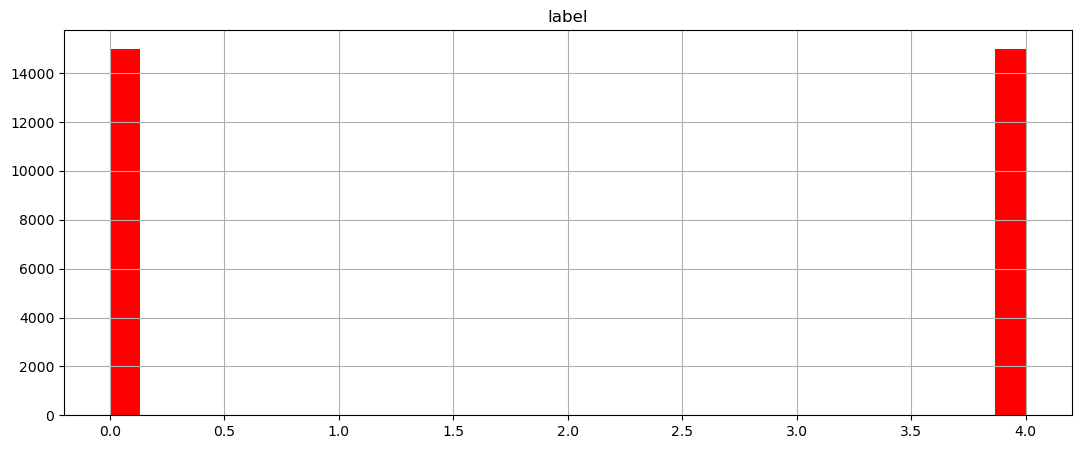

In [8]:
tweets_df.hist(bins = 30, figsize = (13,5), color = 'r')

In [9]:
tweets_df['length'] = tweets_df['tweet'].apply(len)

In [10]:
tweets_df

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,What do you mean its 11:30 and i only just wok...,65
3,0,"@Minervity sorry, this: Creating a Space-Helme...",110
4,0,ahhh it looks so sunny .. however I still need...,134
...,...,...,...
29995,4,We just met some awesome people at T.G.I Fridays,49
29996,4,oh my goodness . my feet are the most sensitiv...,96
29997,4,@hey_angy hahaha,17
29998,4,@Lamartian30 Pfft school is koo. I'm ranked 2n...,126


In [11]:
tweets_df.describe()

,label,length
count,30000.000000,30000.000000
mean,2.000000,73.463667
std,2.000033,36.084181
min,0.000000,6.000000
25%,0.000000,43.000000
50%,2.000000,69.000000
75%,4.000000,102.000000
max,4.000000,186.000000


In [12]:
# Let's see the shortest message 
tweets_df[tweets_df['length'] == 6]['tweet'].iloc[0]

'#NAME?'

In [13]:
# Let's view the message with mean length 
tweets_df[tweets_df['length'] == 73]['tweet'].iloc[0]

'About to Do My Art Homework ugghhhhhh    Ms.Halpan Die In your Sleep!....'

<AxesSubplot: ylabel='Frequency'>

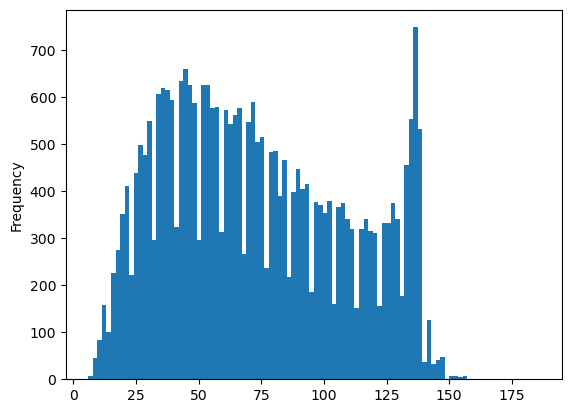

In [14]:
# Plot the histogram of the length column
tweets_df['length'].plot(bins=100, kind='hist') 

# PLOT WORDCLOUD

In [15]:
positive = tweets_df[tweets_df['label']==0]
positive

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,What do you mean its 11:30 and i only just wok...,65
3,0,"@Minervity sorry, this: Creating a Space-Helme...",110
4,0,ahhh it looks so sunny .. however I still need...,134
...,...,...,...
14995,0,its going to be HOT!!!,23
14996,0,is feeling blah these days,27
14997,0,Going on a road trip tomorrow and so hung over...,78
14998,0,SO sad to learn that there will be no party bu...,69


In [16]:
negative = tweets_df[tweets_df['label']==4]
negative

,label,tweet,length
15000,4,I LOVE @Health4UandPets u guys r the best!!,44
15001,4,I swear you can not get anything better than a...,116
15002,4,@sammijo66 if it's only a paper I'd suggest: a...,102
15003,4,i've been playing with SQLite. what do I think...,63
15004,4,recording a new video,22
...,...,...,...
29995,4,We just met some awesome people at T.G.I Fridays,49
29996,4,oh my goodness . my feet are the most sensitiv...,96
29997,4,@hey_angy hahaha,17
29998,4,@Lamartian30 Pfft school is koo. I'm ranked 2n...,126


In [17]:
tweets = tweets_df['tweet'].tolist()
len(tweets)

30000

In [18]:
tweets_in_one_string =" ".join(tweets)

In [19]:
tweets_in_one_string

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! What do you mean its 11:30 and i only just woke up...! Oh cock.   @Minervity sorry, this: Creating a Space-Helmeted Future Retro Illustration - http://bit.ly/TiWeN &lt;--wrong  ahhh it looks so sunny .. however I still need a scarf today, considering my current health condition  oh well, not hot pants today ;) I have a rash on my face  Why? Uncle Hai says better now than later when he's going to introduce me to a lot hot chicks ;) @gaiachik so sorry to hear that  is tired from an exhausting day. busy week ahead  is up... might be going back to bed, though, if someone doesn't answer their phone!!!  Oh man. @ThelastDoctor seems to be dying.  back from hols, wanna still be in france  company has left, now alone  had a great jam session tonight tho  good times in t

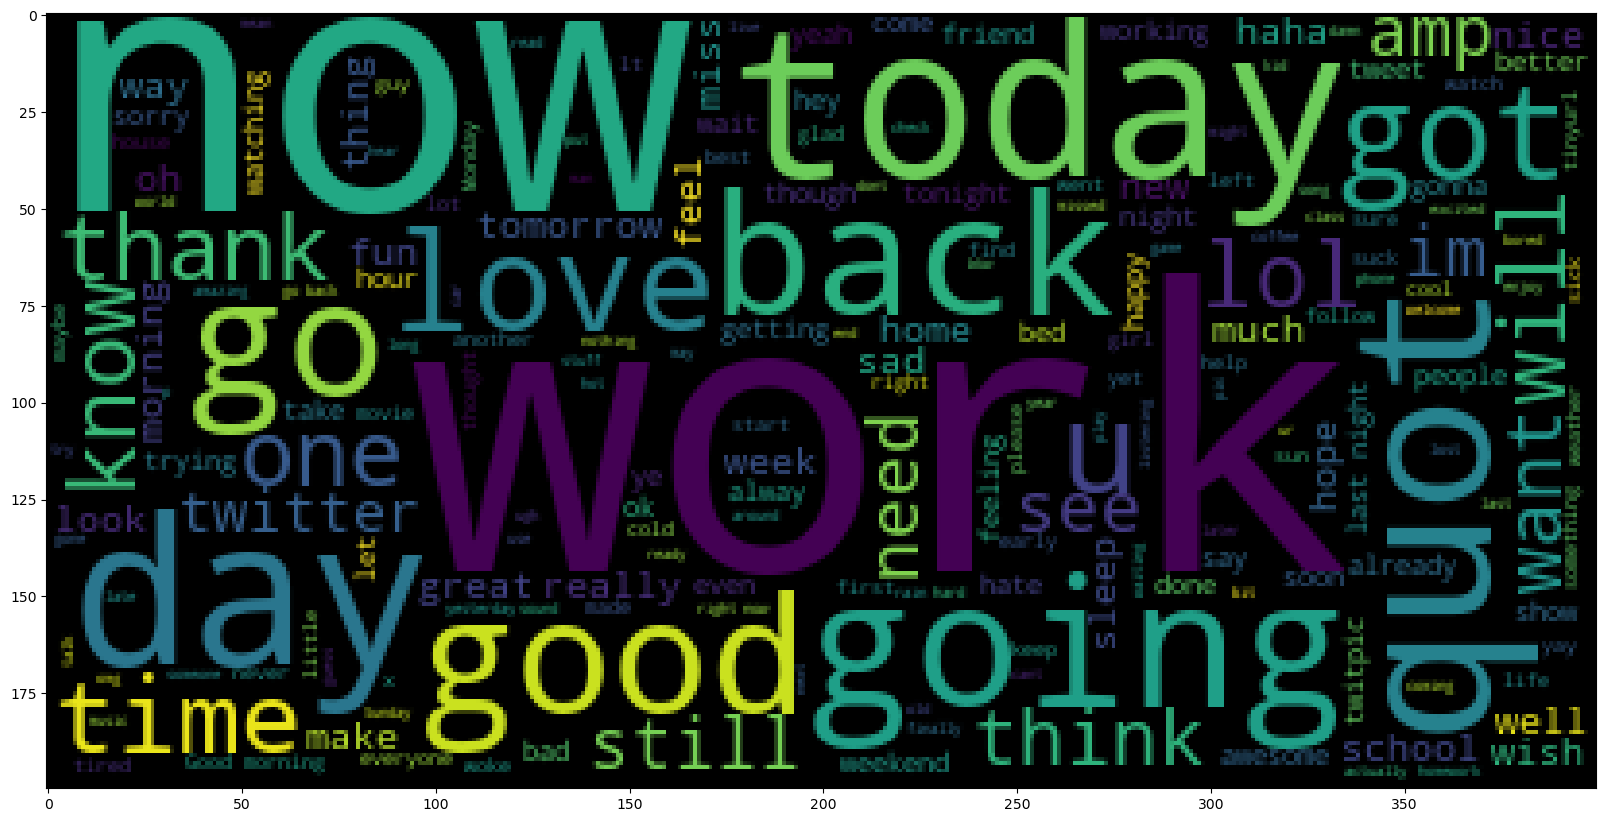

In [20]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(tweets_in_one_string))

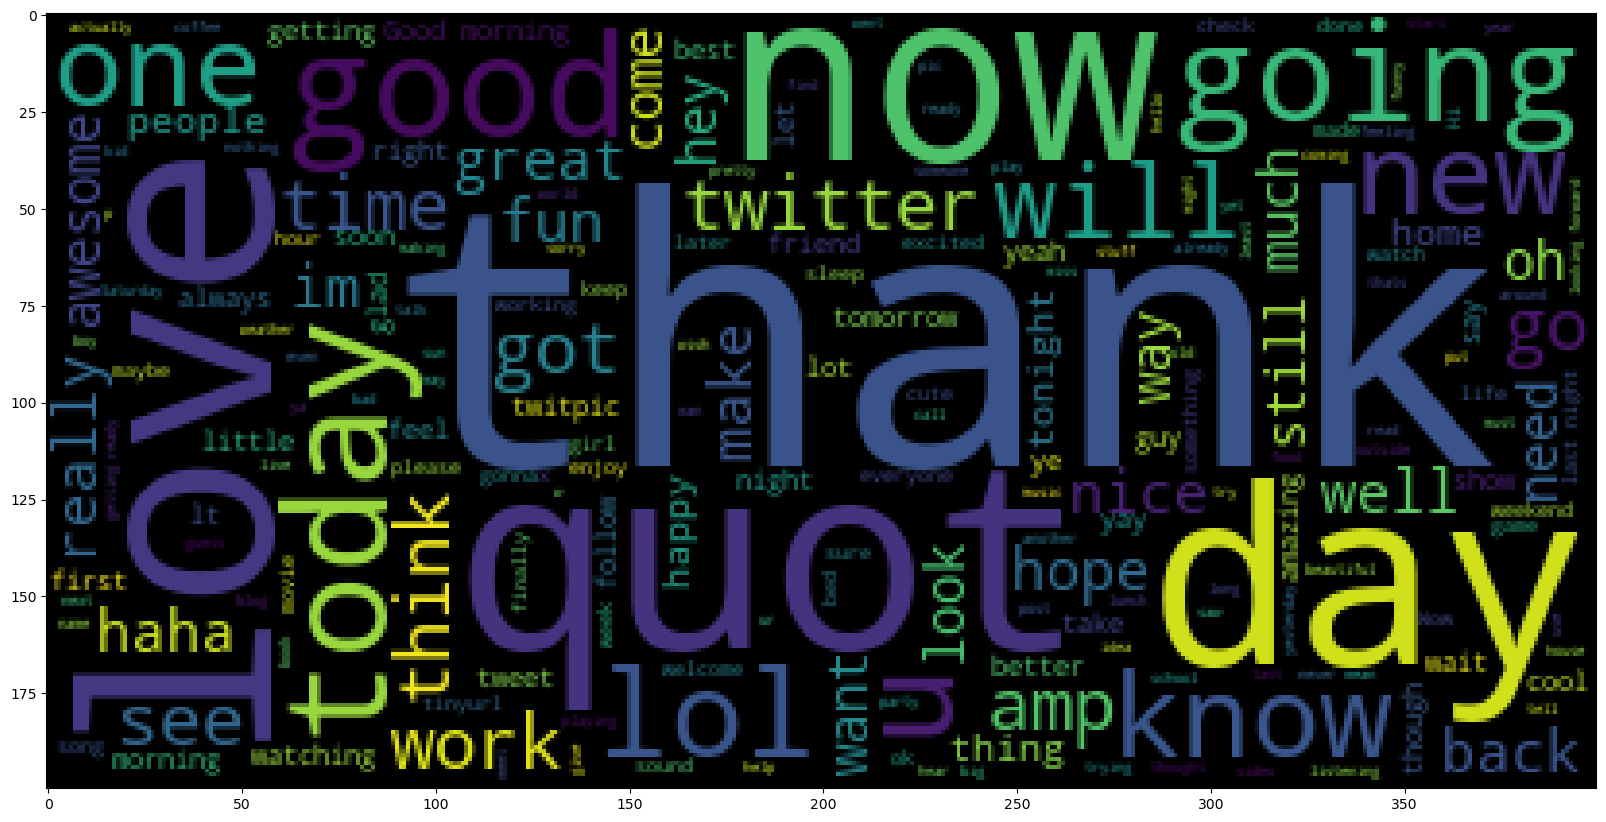

In [21]:
negative_tweets = negative['tweet'].tolist()
negative_tweets
negative_tweets_in_one_string = " ".join(negative_tweets)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_tweets_in_one_string))

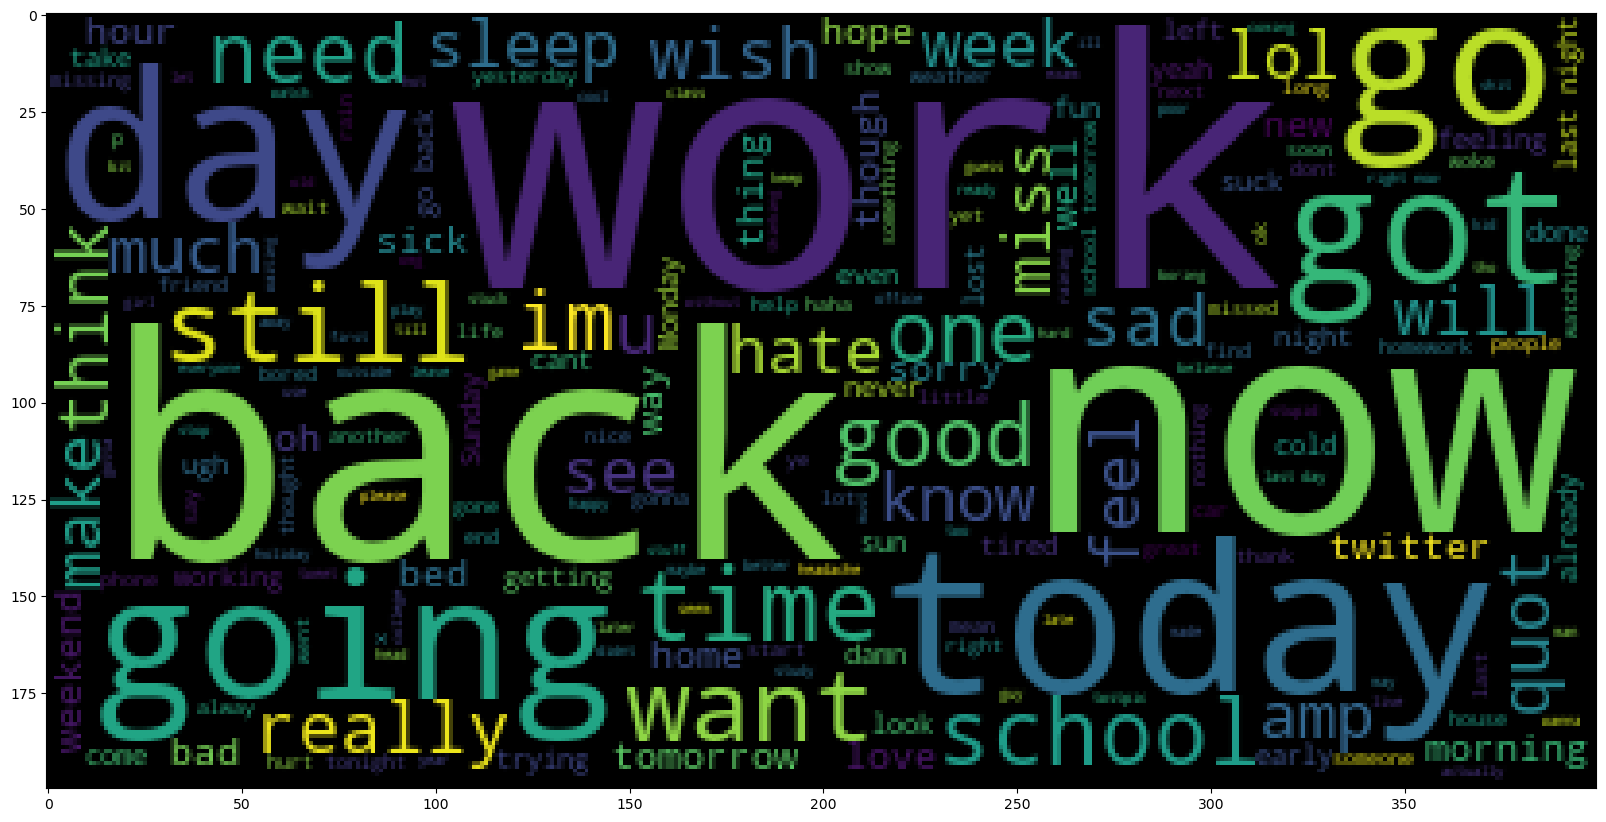

In [22]:
positive_tweets = positive['tweet'].tolist()
positive_tweets
positive_tweets_in_one_string = " ".join(positive_tweets)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_tweets_in_one_string))

# DATA CLEANING - REMOVE PUNCTUATION FROM TEXT

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and Python!!'

In [25]:
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n']

In [26]:
# Join the characters again to form the string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Good morning beautiful people  I am having fun learning Machine learning and Python'

# DATA CLEANING - REMOVE STOPWORDS

In [27]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/jai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
Test_punc_removed_join = 'I enjoy coding, programming and Artificial intelligence'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [29]:
Test_punc_removed_join_clean

['enjoy', 'coding,', 'programming', 'Artificial', 'intelligence']

In [30]:
Test_punc_removed_join

'I enjoy coding, programming and Artificial intelligence'

# COUNT VECTORIZATION (TOKENIZATION)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [32]:
print(vectorizer.get_feature_names_out())


['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']


In [33]:
print(X.toarray())  

[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


# FUNCTIONS TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [34]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [35]:
tweets_df_clean = tweets_df['tweet'].apply(message_cleaning)

In [36]:
print(tweets_df_clean[5])

['rash', 'face', 'Uncle', 'Hai', 'says', 'better', 'later', 'hes', 'going', 'introduce', 'lot', 'hot', 'chicks']


In [37]:
print(tweets_df['tweet'][5])

I have a rash on my face  Why? Uncle Hai says better now than later when he's going to introduce me to a lot hot chicks ;)


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_df['tweet'])

In [39]:
print(vectorizer.get_feature_names())


['0', '00', '0007', '01000101', '01500', '01614948343', '017', '02', '02May', '02R96', '04', '06', '060', '0640', '07', '0742009', '0752', '08', '0800', '09', '09quot', '0Clock', '0X', '0amityville0', '0boy', '0h', '0lli', '0mGiiTzRee', '0mie', '0n', '0o', '0s', '1', '10', '100', '1000', '10000', '100000', '100001', '10000Kg', '1000am300pmPeople', '1000d', '1001', '1005', '100GB', '100day', '100degrees', '100gb', '100m2', '100milerwonder', '100th', '100to', '100x', '101', '1010ï¿½', '1013', '1013pm', '1015', '102', '1022', '1023', '1027', '1029', '103', '1030', '103012', '1030h', '1033', '1035', '1037', '104', '1044', '1045', '105', '10570', '105km', '106', '1066quot', '1085', '10932', '10AM', '10Day', '10K', '10KM', '10Pack', '10am', '10day', '10ft', '10h30', '10k', '10lbs', '10mb', '10mila', '10min', '10minutes', '10oz', '10pm', '10s', '10th', '10x', '10year', '10yrs', '11', '110', '1100pm', '1104', '1111', '1115', '1115pm', '111adam', '1120', '1120where', '1122', '112th', '113', '11

/home/jai/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
print(tweets_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
tweets_countvectorizer.shape

(30000, 48199)

In [42]:
X = pd.DataFrame(tweets_countvectorizer.toarray())


In [43]:
X

,0,1,2,3,4,5,6,7,8,9,...,48189,48190,48191,48192,48193,48194,48195,48196,48197,48198
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y = tweets_df['label']

# NAIVE BAYES CLASSIFIER MODEL

In [45]:
X.shape

(30000, 48199)

In [46]:
y.shape

(30000,)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot: >

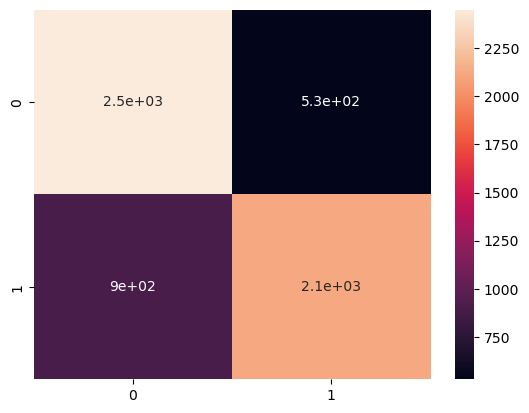

In [50]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [51]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      2980
           4       0.80      0.70      0.75      3020

    accuracy                           0.76      6000
   macro avg       0.77      0.76      0.76      6000
weighted avg       0.77      0.76      0.76      6000

